In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os,sys
import pylab as plt
%matplotlib inline

import glob


src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

src_meta = '../../gutenberg/src/'
sys.path.append(src_meta)
from metaquery import meta_query

In [2]:
# Load meta data
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

### Load bookshelves

+ `list_books` must be a list of lists of PG codes
+ `list_subjects` holds the subject names

In [3]:
df = pd.read_pickle("../data/bookshelves_clean.p")

In [4]:
for bs in df.columns:
    break

In [5]:
list_books = [list(df.index)] + [ list(df[bs].dropna().index) for bs in df.columns]
list_subjects = ["ALL"] + list(df.columns)

In [6]:
arr_alpha = np.array([0.0,1.0,2.0])
Npair = 500
weights = False ## standard 1/2,1.2
normalized = True ## 0<=divergence <=1

path_read = '../../gutenberg/data/counts/'

list_jsdalpha = []
list_labels = []
for i_s,s in enumerate(list_subjects):
    print(s)
    list_jsd_tmp = []
    books_tmp=list_books[i_s]
    for i_Npair in range(Npair):
        
        book_sel = True
        while book_sel== True:

            pg1,pg2 = np.random.choice(books_tmp,replace=False,size=2)
            fname_read = '%s_counts.txt'%(pg1)
            filename1 = os.path.join(path_read,fname_read)

            fname_read = '%s_counts.txt'%(pg2)
            filename2 = os.path.join(path_read,fname_read)
            
            if os.path.isfile(filename1) and os.path.isfile(filename2):
                book_sel = False
        jsd = jsdalpha(filename1,filename2,alpha=arr_alpha,weights=weights,normalized=normalized)
        list_jsd_tmp += [jsd]
    list_jsdalpha += [list_jsd_tmp]

ALL
Opera_(Bookshelf)
Scientific_American_(Bookshelf)
Slavery_(Bookshelf)
Harper's_Young_People_(Bookshelf)
United_States_(Bookshelf)
Science_Fiction_by_Women_(Bookshelf)
World_War_II_(Bookshelf)
Poetry_(Bookshelf)
Classical_Antiquity_(Bookshelf)
Judaism_(Bookshelf)
Crafts_(Bookshelf)
The_American_Missionary_(Bookshelf)
Australia_(Bookshelf)
Travel_(Bookshelf)
Biology_(Bookshelf)
Latter_Day_Saints_(Bookshelf)
Fantasy_(Bookshelf)
Blackwood's_Edinburgh_Magazine_(Bookshelf)
Cookery_(Bookshelf)
France_(Bookshelf)
Chambers's_Edinburgh_Journal_(Bookshelf)
Philosophy_(Bookshelf)
Astounding_Stories_(Bookshelf)
Music_(Bookshelf)
Art_(Bookshelf)
Short_Stories_(Bookshelf)_Authors_F-J
Canada_(Bookshelf)
Medicine_(Bookshelf)
School_Stories_(Bookshelf)
Children's_History_(Bookshelf)
Masterpieces_in_Colour_(Bookshelf)
Pirates,_Buccaneers,_Corsairs,_etc._(Bookshelf)
Movie_Books_(Bookshelf)
Children's_Myths,_Fairy_Tales,_etc._(Bookshelf)
Animals-Wild_(Bookshelf)-Birds
Detective_Fiction_(Bookshelf)
One_

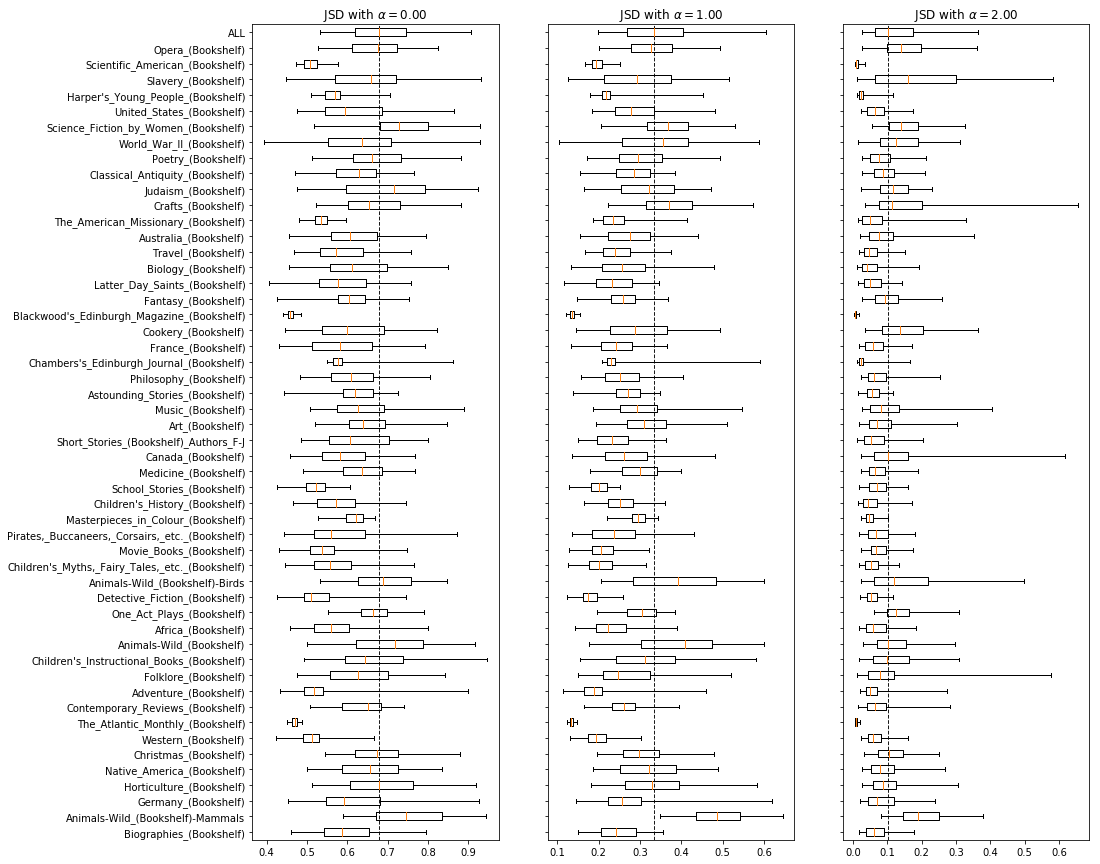

In [65]:
f=plt.figure(figsize = (15,15))
for i_alpha, alpha in enumerate(arr_alpha):
    ax=f.add_subplot(1,3,i_alpha+1)
    list_jsd_plot = [ [h[i_alpha] for h in jsd_tmp] for jsd_tmp in list_jsdalpha ]

    _ = ax.boxplot(list_jsd_plot,vert=False,whis=[2.5,97.5],labels=list_subjects,sym='')
    _ = ax.set_title(r'JSD with $\alpha = %.2f$'%(alpha))
    _ = ax.axvline(np.median(list_jsd_plot[0]), zorder=-1, c="0.1", linestyle="dashed", lw=1)
    
    if i_alpha>0:
        ax.set_yticklabels([])
    ax.invert_yaxis()

I think we might want to eliminate magazines??? See the Atlantic ...